## ***MOVIE RATING PREDICTION***

In [61]:
# import Libraries 

import pandas as pd 

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

### ***Loading Data set***

In [62]:
#load_dataset 
df = pd.read_csv('IMDB.csv', encoding='latin1')

In [63]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [64]:
df.shape

(15509, 10)

In [65]:
df['Rating'].value_counts()


Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64

In [66]:
df['Rating'].unique()

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [67]:
df['Name'].unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

In [68]:
#remove " #from " the set.....
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')



In [69]:
print(df['Name'].unique())


[' ' 'Gadhvi ' 'Homecoming' ... 'Zulmi Raj' 'Zulmi Shikari' 'Zulm-O-Sitam']


In [70]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [71]:
df['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

### Cleaning the data

In [72]:
##Find the typos
for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' 'Gadhvi ' 'Homecoming' ... 'Zulmi Raj' 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' 

In [73]:
df.isnull().sum()

Name          10
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [74]:
# handling missing values 
df.dropna(subset=['Name','Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
# Splitting the genre by , to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [75]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [76]:
# removing  the brackets in column "year"



df['Year'] = df['Year'].str.replace('[\(\)]', '', regex=True)


In [77]:
df['Year'].head()

1    2019
3    2019
3    2019
5    1997
5    1997
Name: Year, dtype: object

In [78]:
# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')


In [79]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [80]:
df = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [81]:

df = df.drop_duplicates(['Name'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,Andheri,2014,116,Action,4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [82]:
# Convert 'Year' to numeric 
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

## Outcome after data cleaning 
1.Find Null values and handle these values by dropping rows and only  "Genre" column null values filled by its mode 

2.convert duration and votes to numeric values 

3.we also found the typos in the dataset,and correct it accordingly

5.find the duplicates rows in the column year and name and drop these duplicates from the columns

## ***Expolaitry Data Analysis*** 

In [83]:
df.describe()






,Year,Duration,Rating,Votes
count,3752.000000,3752.000000,3752.000000,3752.000000
mean,1995.756930,136.839019,5.903998,3607.466418
std,19.224101,24.569841,1.356279,16305.282262
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,122.000000,5.000000,50.000000
50%,2001.000000,138.000000,6.100000,260.000000
75%,2012.000000,153.000000,6.900000,1698.250000
max,2021.000000,321.000000,10.000000,591417.000000


In [84]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,Andheri,2014,116,Action,4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [85]:
#summary of statistics for columns with categorical data.
df.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,3752,3752,3752,3752,3752,3752
unique,3752,18,1653,1227,1521,1754
top,Yaaram,Action,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,1,1362,32,87,36,39


### Let's Do the  univariate, bivariate and multivariate descriptive statistics

#### Descriptive analysis

In [86]:
# row with the highest number of votes
max_votes_row = df[df['Votes'] == df['Votes'].max()]

# name of the movie with the highest votes
movie_highest_vote = max_votes_row['Name'].values[0]

# number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie With Highest Votes:", movie_highest_vote)
print("Number of votes for the movie with highest votes:", votes_highest_votes)



Movie With Highest Votes: Life of Pi
Number of votes for the movie with highest votes: 591417


In [87]:
# row with the lowest number of votes
min_votes_row = df[df['Votes'] == df['Votes'].min()]

# name of the movie with the lowest number of votes votes
movie_lowest_vote = min_votes_row['Name'].values[0]

# number of votes for the movie with the highest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie With lowest Votes:", movie_lowest_vote)
print("Number of votes for the movie with lowest votes:", votes_lowest_votes)

Movie With lowest Votes: Bhai-Bahen
Number of votes for the movie with lowest votes: 5


In [88]:
# row with the highest number of Rating
max_Rating_row = df[df['Rating'] == df['Rating'].max()]

# name of the movie with the highest Rating
movie_highest_Rating = max_Rating_row['Name'].values[0]

# number of votes for the movie with the highest Rating
votes_highest_Rating = max_Rating_row['Votes'].values[0]

print("Movie With Highest Rating:", movie_highest_Rating)
print("Number of votes for the movie with the highest Rating:", votes_highest_Rating)


Movie With Highest Rating: Love Qubool Hai
Number of votes for the movie with the highest Rating: 5


In [89]:
# Find the row with the lowest rating

min_Rating_row = df[df['Rating'] == df['Rating'].min()]

# name of the movie with the highest Rating
movie_lowest_Rating = min_Rating_row['Name'].values[0]

votes_lowest_Rating = min_Rating_row['Votes'].values[0]
print("Number of votes for the movie with the lowest Rating:", votes_highest_Rating)
print("Number of votes for the movie with the lowest Rating:", movie_lowest_Rating)


Number of votes for the movie with the lowest Rating: 5
Number of votes for the movie with the lowest Rating: Sadak 


In [90]:
#Group datasets by the director column to find the and count the number of movies each director has directed
director_counts=df['Director'].value_counts()

#find the director column and count the number of movies each director has directed
director =director_counts.idxmax()
num_movies_directed=director_counts.max()
print("Name of the director with most movie directed:",director)
print("Number of movies directed:",num_movies_directed)




Name of the director with most movie directed: David Dhawan
Number of movies directed: 32


In [91]:
director_counts=df['Director'].value_counts()
l_director=director_counts.idxmin()
num_movies_directed=director_counts.min()
print("Name of the director with least movie directed:",l_director )
print("Number of movies directed:",num_movies_directed)


Name of the director with least movie directed: Rajasekar
Number of movies directed: 1


# Univariate Analysis

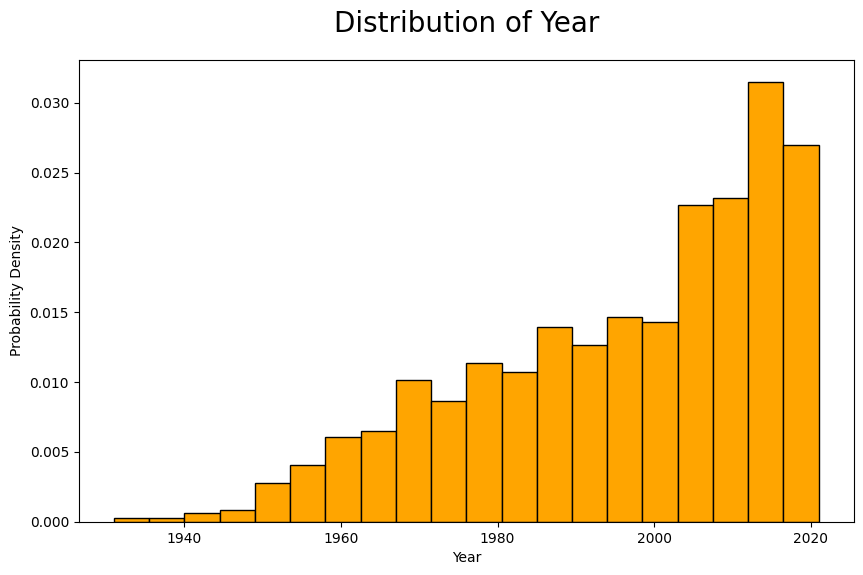

In [92]:


# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=20, density=True, color='orange', edgecolor='black')

# Customize plot
plt.title('Distribution of Year', pad=20, fontsize=20)
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.grid(False)

# Show plot
plt.show()



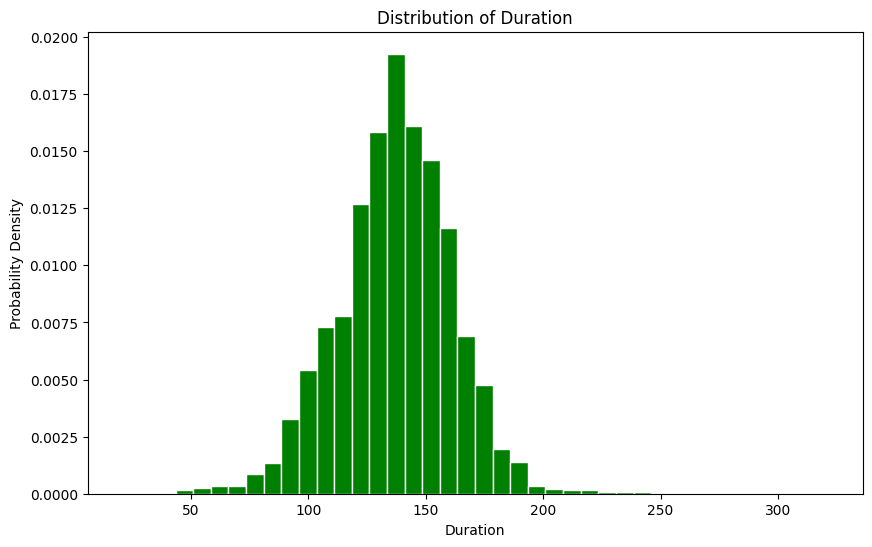

In [93]:


# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df['Duration'], bins=40, density=True, color='green', edgecolor='white')

# Customize plot
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Probability Density')
plt.grid(False)

# Show plot
plt.show()



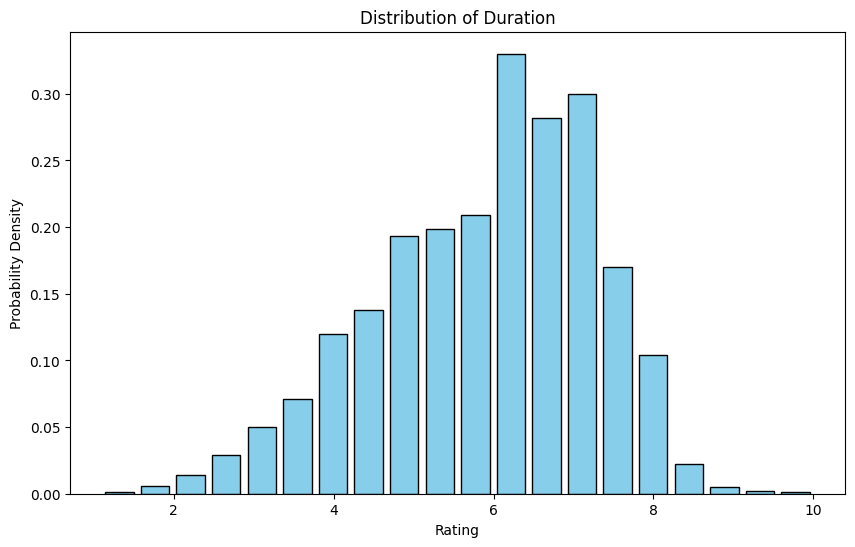

In [94]:



# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with adjusted bar width
plt.hist(df['Rating'], bins=20, density=True, color='skyblue', edgecolor='black', rwidth=0.8)

# Customize plot
plt.title('Distribution of Duration')
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.grid(False)

# Show plot
plt.show()


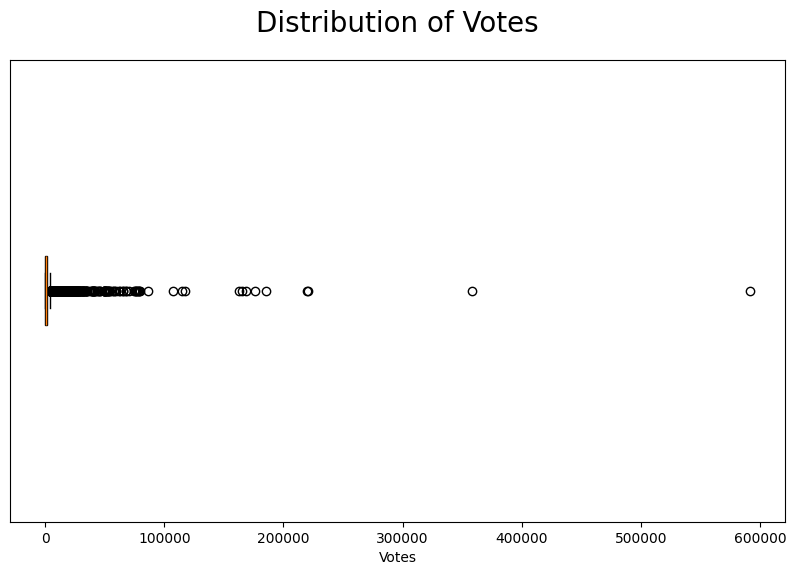

In [95]:



# Set figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.boxplot(df['Votes'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Customize plot
plt.title('Distribution of Votes', pad=20, fontsize=20)
plt.xlabel('Votes')
plt.yticks([])  # Removed 'Probability Density', as y-axis is hidden in boxplot
plt.grid(False)

# Show plot
plt.show()




## Bivariate Analysis

##### ***group year data and calculate the average rating***

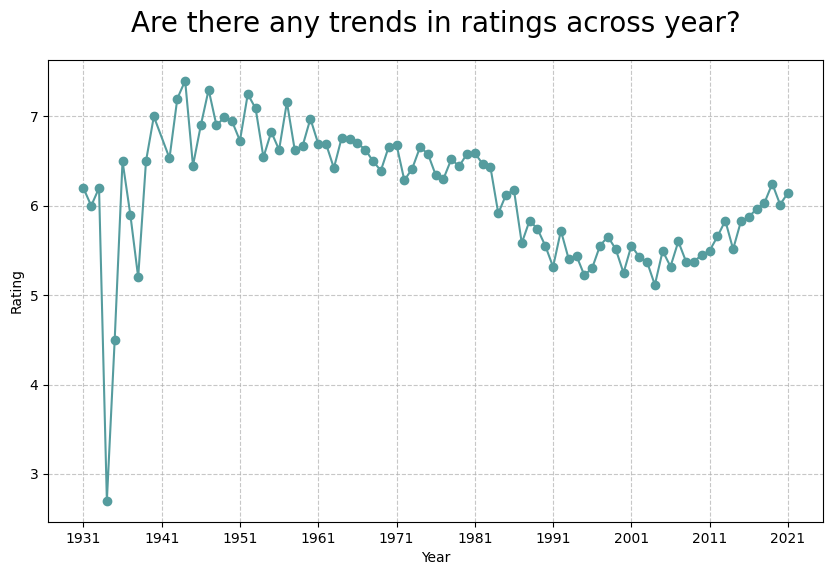

In [96]:





# Group data by Year and calculate the average rating
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_year['Year'], average_rating_by_year['Rating'], color='#559C9E', marker='o')

# Customize the x-axis ticks to include only every 10th year
plt.xticks(range(min(average_rating_by_year['Year']), max(average_rating_by_year['Year'])+1, 10))

# Customize the plot
plt.title('Are there any trends in ratings across year?', fontsize=20, pad=20)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



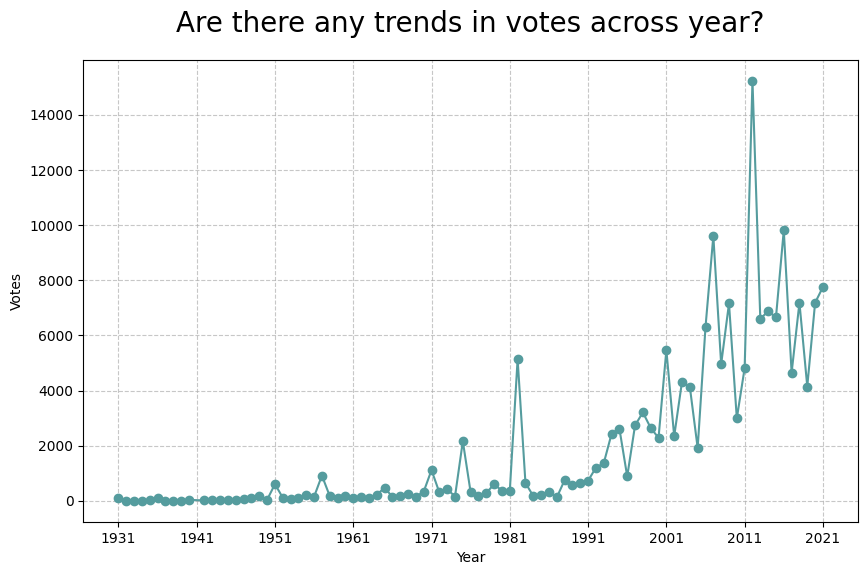

In [97]:

average_rating_by_year = df.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_year['Year'], average_rating_by_year['Votes'], color='#559C9E', marker='o')

# Customize the x-axis ticks to include only every 10th year
plt.xticks(range(min(average_rating_by_year['Year']), max(average_rating_by_year['Year'])+1, 10))

# Customize the plot
plt.title('Are there any trends in votes across year?', fontsize=20, pad=20)
plt.xlabel('Year')
plt.ylabel('Votes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


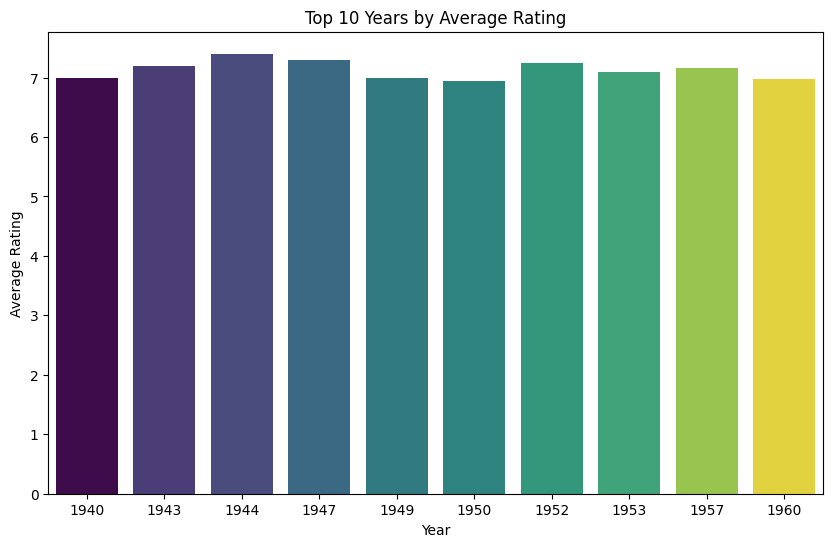

In [98]:





year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()

# Get top 10 years
top_10_years = year_avg_rating.nlargest(10, 'Rating')

# Create a bar plot with 'Year' as hue
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Year', y='Rating', data=top_10_years, hue='Year', palette='viridis', dodge=False, legend=False)

# Set titles and labels
plt.title('Top 10 Years by Average Rating')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Show the plot
plt.show()



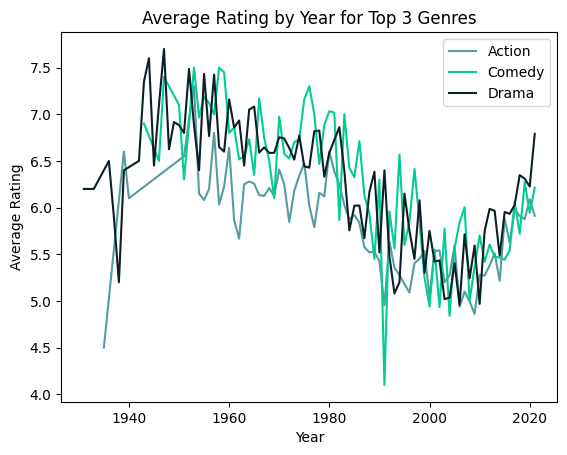

In [99]:




# Assuming 'average_rating_by_year' is the DataFrame with the grouped data
average_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()
# Get the top 3 genres
top_3_genres = df['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a dictionary to map genre to colors
genre_colors = {'Action': '#559C9E', 'Drama': '#0B1F26', 'Comedy': '#00CC96'}

# Plot each genre separately
for genre, data in average_rating_by_year.groupby('Genre'):
    ax.plot(data['Year'], data['Rating'], label=genre, color=genre_colors[genre])

# Customize the layout
ax.set_title('Average Rating by Year for Top 3 Genres')
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.legend()
ax.grid(False)
fig.patch.set_facecolor('white')

# Show the plot
plt.show()


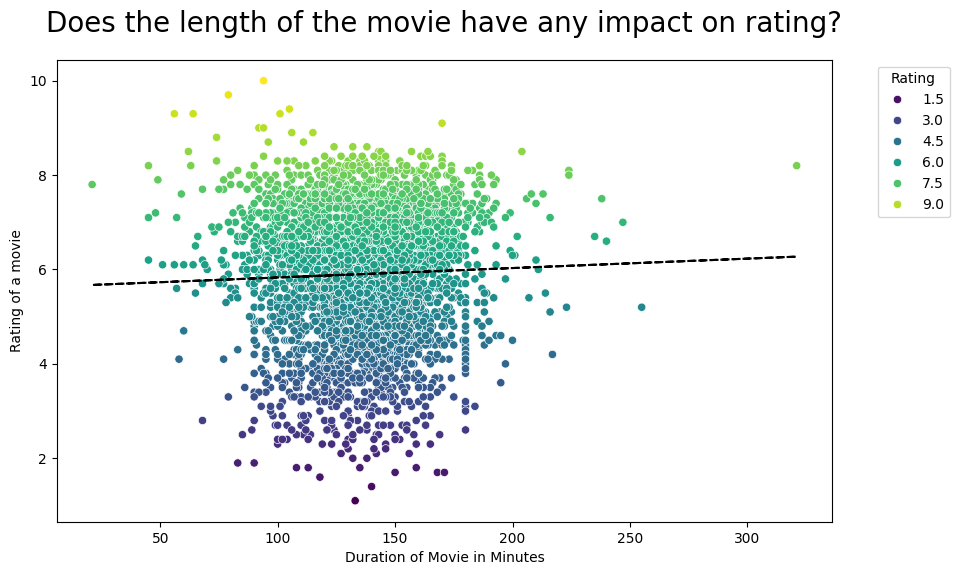

In [100]:



# Create a scatter plot with seaborn
fig_dur_rat, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', hue='Rating', data=df, palette='viridis', ax=ax)

# Add a trendline using numpy.polyfit
z = np.polyfit(df['Duration'], df['Rating'], 1)
p = np.poly1d(z)
ax.plot(df['Duration'], p(df['Duration']), color='black', linestyle='--')

# Customize the layout
ax.set_title('Does the length of the movie have any impact on rating?', fontsize=20, pad=20)
ax.set_xlabel('Duration of Movie in Minutes')
ax.set_ylabel('Rating of a movie')
ax.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)
fig_dur_rat.patch.set_facecolor('white')

# Show the plot
plt.show()


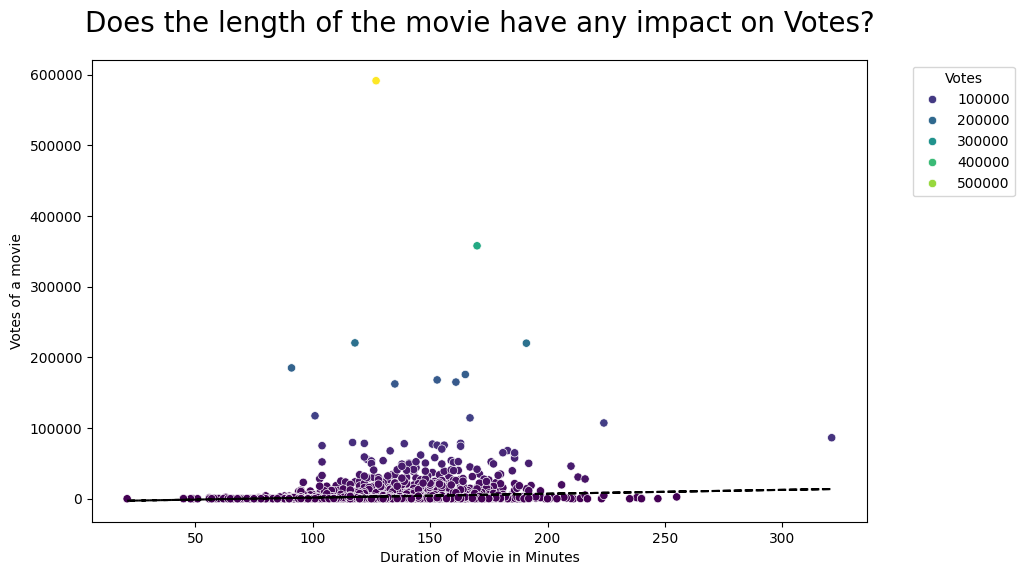

In [101]:

# Create a scatter plot with seaborn
fig_dur_votes, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Votes', hue='Votes', data=df, palette='viridis', ax=ax)

# Add a trendline using numpy.polyfit
z = np.polyfit(df['Duration'], df['Votes'], 1)
p = np.poly1d(z)
ax.plot(df['Duration'], p(df['Duration']), color='black', linestyle='--')

# Customize the layout
ax.set_title('Does the length of the movie have any impact on Votes?', fontsize=20, pad=20)
ax.set_xlabel('Duration of Movie in Minutes')
ax.set_ylabel('Votes of a movie')
ax.legend(title='Votes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)
fig_dur_votes.patch.set_facecolor('white')

# Show the plot
plt.show()


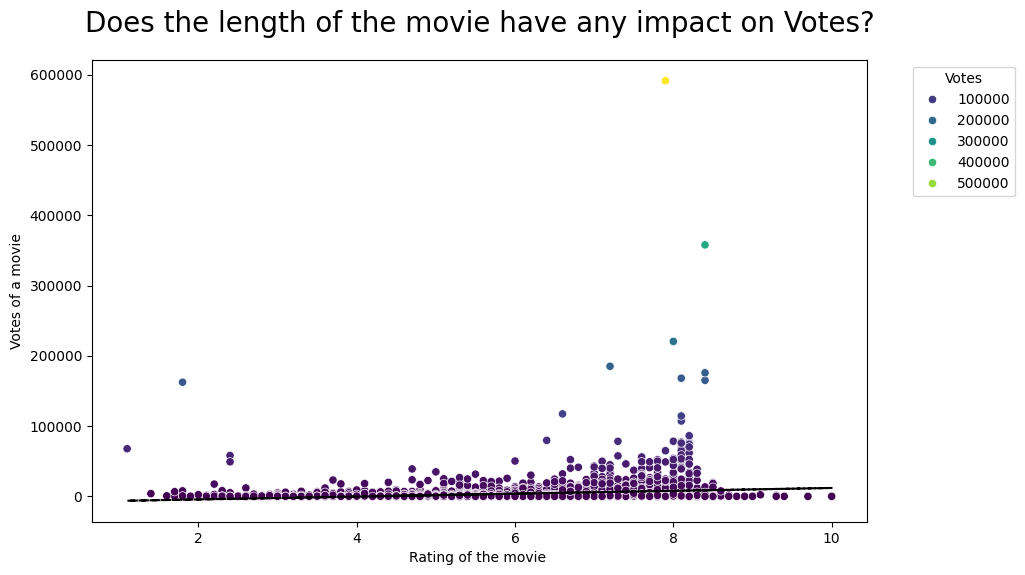

In [102]:
# Create a scatter plot with seaborn
fig_dur_votes, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Votes', hue='Votes', data=df, palette='viridis', ax=ax)

# Add a trendline using numpy.polyfit
z = np.polyfit(df['Rating'], df['Votes'], 1)
p = np.poly1d(z)
ax.plot(df['Rating'], p(df['Rating']), color='black', linestyle='--')

# Customize the layout
ax.set_title('Does the length of the movie have any impact on Votes?', fontsize=20, pad=20)
ax.set_xlabel('Rating of the movie ')
ax.set_ylabel('Votes of a movie')
ax.legend(title='Votes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(False)
fig_dur_votes.patch.set_facecolor('white')

# Show the plot
plt.show()

# Data preprocessing


In [103]:
#drop non essentail column
df.drop('Name',axis=1, inplace=True)

In [104]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_mean_rating'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_mean_rating'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_mean_rating'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_mean_rating'] = actor3_mean_rating


In [105]:
#splitting into training and testing
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_mean_rating','Actor1_mean_rating', 'Actor2_mean_rating', 'Actor3_mean_rating']]

y = df['Rating']

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building + Evalution

In [107]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)
Lr_pred=Lr.predict(X_test)


#Evalution
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Lr_pred))
print('R2 score: ',r2_score(y_test, Lr_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.43598520634870763
Mean absolute error:  0.47778240975736186
R2 score:  0.7596766316418925


In [108]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

#Evaluation 

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.3695831078561917
Mean absolute error:  0.39832756324900104
R2 score:  0.7962787358954134


## Evaluation result

#### on the basis of  **r**2_score, RandomForestRegressor perform well

In [109]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_mean_rating,Actor1_mean_rating,Actor2_mean_rating,Actor3_mean_rating
3,2019,35,110,5.883505,4.400000,5.025000,4.400000,4.450000
5,1997,827,147,5.883505,5.507143,4.814286,5.786667,6.066667
6,2005,1086,142,6.128085,7.383333,5.412500,6.750000,6.900000
8,2012,326,82,4.704255,5.600000,5.600000,5.600000,5.600000
9,2014,11,116,5.612408,4.000000,4.000000,4.550000,4.000000


In [110]:
y.head()

3    4.4
5    4.7
6    7.4
8    5.6
9    4.0
Name: Rating, dtype: float64

# Creating a new dataframe with values close to the 3rd row according to the sample above 

In [118]:

data = {'Year': [2019], 'Votes': [50], 'Duration': [110], 'Genre_mean_rating': [3.5], 'Director_mean_rating': [6.8], 'Actor1_mean_rating': [5.9], 'Actor2_mean_rating': [5.9], 'Actor3_mean_rating': [5.900]}
df1= pd.DataFrame(data)

In [119]:
# Predict the movie rating
predicted_rating = rf.predict(df1)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.0189999999999975


# ***Insights***

1. first movie released in 1931 and the movie duration is just 45 minutes 
2. The most movies Directed by David Dahawan 
3. The least Movie Directed by  Rajasekar  
4. The analysis also reveals about the best performing and worst movies based on votes and ratings as can be seen above
5. Most movies directed between 4 years , 2015 to mid 2020.
6. The number votes have many Outliers.
7. The ratio has guassian dustribution with high concentration of 6.6 to 6.7
8. Genere, Darama has the highest rating since it's start
9. The shorter length of the movie got more votes and Rating
